<a href="https://colab.research.google.com/github/PurushothamNaidu143/Machine-Learning-models/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Data Set**

In [ ]:
import seaborn as sns
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Feature sets**

In [ ]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y=df.species.values
y[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors

**Splitting the data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Normalize the data**

In [ ]:
X_train_norm=preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test_norm=preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm

array([[ 0.14443512, -0.63451517,  0.45110832, -0.07943674],
       [-0.33701527,  2.00929805, -1.2060243 , -1.20827465],
       [ 2.07023667, -1.16327782,  1.66633891,  1.30025404],
       [ 0.02407252, -0.37013385,  0.34063282,  0.29684256],
       [ 0.98697329, -0.63451517,  0.50634608,  0.17141613],
       [-0.69810306,  0.95177276, -1.3164998 , -1.08284822],
       [-0.45737787, -0.37013385, -0.15650697,  0.04598969],
       [ 1.10733589,  0.15862879,  0.67205934,  1.30025404],
       [ 0.26479771, -2.22080311,  0.34063282,  0.29684256],
       [-0.21665267, -0.8988965 ,  0.00920629, -0.07943674],
       [ 0.6258855 ,  0.42301012,  0.67205934,  0.92397473],
       [-1.42027864, -0.10575253, -1.37173756, -1.45912752],
       [-0.57774046,  1.21615408, -1.42697531, -1.33370109],
       [-1.29991605,  0.15862879, -1.3164998 , -1.45912752],
       [-1.05919085,  2.00929805, -1.3164998 , -1.20827465],
       [ 0.38516031,  0.68739144,  0.45110832,  0.422269  ],
       [ 0.6258855 , -0.

**Building a model for various K-values**

In [ ]:
k=10
mean_acc=np.zeros((k-1))
for i in range(1,k):
  model=neighbors.KNeighborsClassifier(k).fit(X_train_norm,y_train)
  y_predicted=model.predict(X_test_norm)
  mean_acc[i-1]=metrics.accuracy_score(y_test,y_predicted)
mean_acc

array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667])

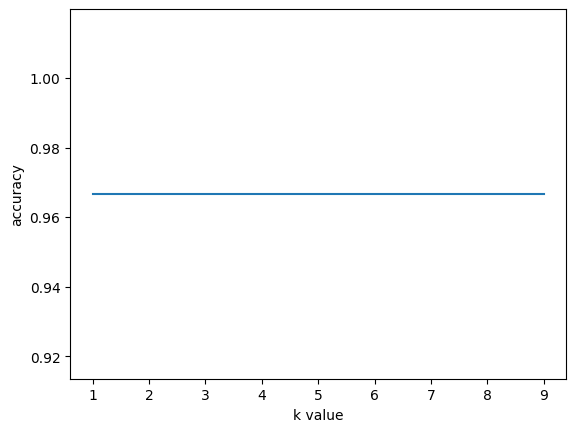

In [ ]:
plt.plot(range(1,k),mean_acc)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()

In [ ]:
print("the highest accuracy is ",mean_acc.max()," with k= ",mean_acc.argmax()+1 )

the highest accuracy is  0.9666666666666667  with k=  1


**It is found that our model shows maximum accuracy when k=1**

**predicting sample species**

In [ ]:
model=neighbors.KNeighborsClassifier(1).fit(X_train_norm,y_train)
y_predicted=model.predict([[0.14443512, -0.63451517,  0.45110832, -0.07943674]])
y_predicted

array(['versicolor'], dtype=object)